In [1]:
import numpy as np
import math

CMIN = -1  # min w x i y
CMAX = 1   # max w x i y
N = 2  # liczba elementów w jednym wymiarze, musi być podzielna przez (cmax - cmin)
D = (CMAX - CMIN) / N  # skok
DIM = (N + 1) ** 2

def k(x, y):
    return 1

# def k(x, y):
#     if y >= 0.5:
#         return 2
#     else:
#         return 1

def g(x, y):
    r = np.sqrt(x*x + y*y)
    psi = np.arctan2(y, x)
    return np.cbrt((r * np.sin(psi + np.pi / 2)) ** 2)

In [2]:
def is_inside(x, y, xmin, xmax, ymin, ymax):
    return x >= xmin and x <= xmax and y >= ymin and y <= ymax

def phi(x, y, n, x0, y0):
    if not is_inside(x, y, x0, x0 + D, y0 - D, y0):
        return 0
    if n == 0:
        return -(x - D - x0) * (y + D - y0) / (D ** 2)
    elif n == 1:
        return (x - x0) * (y + D - y0) / (D ** 2)
    elif n == 2:
        return (x - D - x0) * (y - y0) / (D ** 2)
    elif n == 3:
        return -(x - x0) * (y - y0) / (D ** 2)
    
def phidx(x, y, n, x0, y0):
    if not is_inside(x, y, x0, x0 + D, y0 - D, y0):
        return 0
    if n == 0:
        return -(y + D - y0) / (D ** 2)
    elif n == 1:
        return (y + D - y0) / (D ** 2)
    elif n == 2:
        return (y - y0) / (D ** 2)
    elif n == 3:
        return -(y - y0) / (D ** 2)
    
def phidy(x, y, n, x0, y0):
    if not is_inside(x, y, x0, x0 + D, y0 - D, y0):
        return 0
    if n == 0:
        return -(x - D - x0) / (D ** 2)
    elif n == 1:
        return (x - x0) / (D ** 2)
    elif n == 2:
        return (x - D - x0) / (D ** 2)
    elif n == 3:
        return -(x - x0) / (D ** 2)

In [3]:
def find_x0(i, n):
    return CMIN + (i % (N + 1)) * D - ((n + 1) % 2) * D

def find_y0(i, n):
    return CMAX - (i // (N + 1)) * D + (((n // 2) + 1) % 2) * D

In [4]:
def find_B_component(x0, y0, n1, n2):
    B = 0
    xm = x0 + D/2
    ym = y0 - D/2
    B += k(xm, ym) * D*D * phidx(xm, ym, (3 - n1), x0, y0) * phidx(xm, ym, (3 - n2), x0, y0)
    B += k(xm, ym) * D*D * phidy(xm, ym, (3 - n1), x0, y0) * phidy(xm, ym, (3 - n2), x0, y0)
    return B

def find_B(i, j):
    if i % (N + 1) >= (-CMIN) / D and i // (N + 1) <= (-CMIN) / D\
    or j % (N + 1) >= (-CMIN) / D and j // (N + 1) <= (-CMIN) / D:
        return 0
    B = 0
    if i == j:
        for n in range(4):
            x0 = find_x0(i, n)
            y0 = find_y0(i, n)
            if x0 < CMIN or x0 >= CMAX or y0 <= CMIN or y0 > CMAX:
                continue
            B += find_B_component(x0, y0, n, n)
    else: 
        part_list = []
        (i, j) = (min(i, j), max(i, j))
        if j == i + N + 1:
            part_list = [2, 3]
        if j == i + 1:
            part_list = [1, 3]
        if part_list:
            for n in part_list:
                x0 = find_x0(i, n)
                y0 = find_y0(i, n)
                if x0 < CMIN or x0 >= CMAX or y0 <= CMIN or y0 > CMAX:
                    continue
                n2 = n - (part_list[1] - part_list[0]) % 2 - 1
                B += find_B_component(x0, y0, n, n2)
    return B

In [5]:
def find_L_component(n, x0, y0, xm, ym):
    n = 3 - n
    return D * k(xm, ym) * g(xm, ym) * phi(xm, ym, n, x0, y0)

def find_L(j):
    if (j // (N + 1) != 0 and j // (N + 1) != N) and (j % (N + 1) != 0 and j % (N + 1) != N)\
    or (j % (N + 1) >= (-CMIN) / D and j // (N + 1) <= (-CMIN) / D):
        return 0
    L = 0
    if j // (N + 1) == 0 and j > 0:
        x0 = find_x0(j, 3)
        y0 = find_y0(j, 3)
        L += find_L_component(3, x0, y0, x0 + D/2, y0)
        L += find_L_component(2, x0 - D, y0, x0 - D/2, y0)
    elif j == 0:
        x0 = find_x0(j, 3)
        y0 = find_y0(j, 3)
        L += find_L_component(3, x0, y0, x0 + D/2, y0)
        L += find_L_component(3, x0, y0, x0, y0 - D/2)
    elif j % (N + 1) == 0 and j < N * (N + 1):
        x0 = find_x0(j, 1)
        y0 = find_y0(j, 1)
        L += find_L_component(1, x0, y0, x0, y0 - D/2)
        L += find_L_component(3, x0, y0 - D, x0, y0 - 3*D/2)
    elif j == N * (N + 1):
        x0 = find_x0(j, 1)
        y0 = find_y0(j, 1)
        L += find_L_component(1, x0, y0, x0, y0 - D/2)
        L += find_L_component(1, x0, y0, x0 + D/2, y0 - D)
    elif j // (N + 1) == N and j < DIM - 1:
        x0 = find_x0(j, 0)
        y0 = find_y0(j, 0)
        L += find_L_component(0, x0, y0, x0 + D/2, y0 - D)
        L += find_L_component(1, x0 + D, y0, x0 + 3*D/2, y0 - D)
    elif j == DIM - 1:
        x0 = find_x0(j, 0)
        y0 = find_y0(j, 0)
        L += find_L_component(0, x0, y0, x0 + D/2, y0 - D)
        L += find_L_component(0, x0, y0, x0 + D, y0 - D/2)
    elif j % (N + 1) == N:
        x0 = find_x0(j, 2)
        y0 = find_y0(j, 2)
        L += find_L_component(2, x0, y0, x0 + D, y0 - D/2)
        L += find_L_component(0, x0, y0 + D, x0 + D, y0 + D/2)
    return L

In [6]:
B = np.zeros( (DIM, DIM) )
for i in range(DIM):
    if i % (N + 1) >= (-CMIN) / D and i // (N + 1) <= (-CMIN) / D:
        B[i][i] = 1
        continue
    for j in range(i, DIM):
        if j % (N + 1) >= (-CMIN) / D and j // (N + 1) <= (-CMIN) / D:
            continue
        tmp = find_B(i, j)
        B[i][j] = tmp
        B[j][i] = tmp
        
L = np.zeros( (DIM, 1) )
for j in range(DIM):
    L[j][0] = find_L(j)

##### Ładniejsza macierz:
# for i in range(DIM - 1, -1, -1):
#     if i % (N + 1) >= (-CMIN) / D and i // (N + 1) <= (-CMIN) / D:
#         B = np.delete(B, i, 0)
#         B = np.delete(B, i, 1)
#         L = np.delete(L, i, 0)

W = np.linalg.solve(B, L)
W = [W[i][0] for i in range(len(W))]
# print(B)
# print(L)
#print(W)

In [7]:
def find_temp(x, y):
    temp = 0
    for i in range(DIM):
        x0 = find_x0(i, 3)
        y0 = find_y0(i, 3)
        x_tab = [x0, x0 - D, x0, x0 - D]
        y_tab = [y0, y0, y0 + D, y0 + D]
        for n in range(4):
            x0 = x_tab[n]
            y0 = y_tab[n]
            if x0 < CMIN or x0 >= CMAX or y0 <= CMIN or y0 > CMAX or (x0 >= 0 and y0 > 0):
                continue
            temp += W[i] * phi(x, y, n, x0, y0)
    return temp

## Wizualizacja

In [8]:
### DOKŁADNOŚĆ: ###
EPS = 0.05
SIZE = int((CMAX - CMIN) / EPS)

temps = np.zeros( (SIZE, SIZE) )
y = CMIN + EPS/2
for i in range(SIZE):
    x = CMIN + EPS/2
    for j in range(SIZE):
        if (x > 0 and y > 0):
            temps[i][j] = None
        else:
            temps[i][j] = find_temp(x, y)
        x += EPS
    y += EPS

<IPython.core.display.Javascript object>


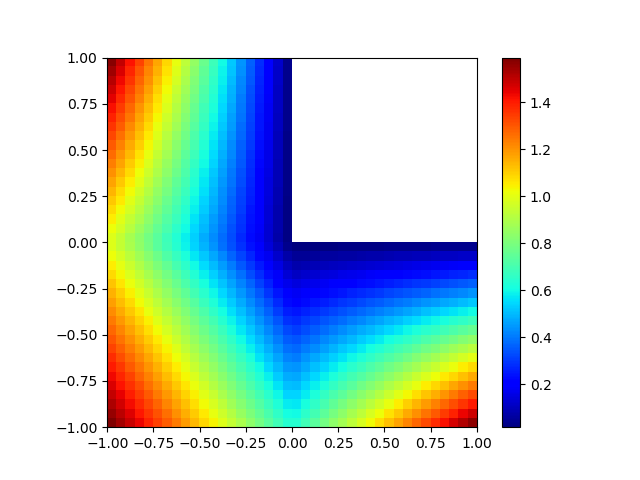

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

plt.imshow(temps, plt.cm.jet, origin = 'lower', extent = (CMIN, CMAX, CMIN, CMAX))
plt.colorbar()
plt.show()